# PCA

In [1]:
import numpy as np
import matplotlib.pyplot as pl

np.set_printoptions(precision=5)

In [6]:
#Spalte 1: x1 Grössen
#Spalte 2: x2 Grössen
Xtilde = np.array([[1,2,4,7,9],
                    [5,2,1,0,-3]]).T
n = len(Xtilde)
print(f'Anzahl Datenpunkte: {n}')

#Hinweis: np.eye und np.identity sind dasselbe
#M ist die zentrierende Matrix
M = np.identity(n) - 1/n * np.ones([n,1]) @ np.ones([n,1]).T

X = M@Xtilde

print(f'Xtilde\n{Xtilde}\nX (zentriert)\n{X}')
print(f'\n{M}')

Anzahl Datenpunkte: 5
Xtilde
[[ 1  5]
 [ 2  2]
 [ 4  1]
 [ 7  0]
 [ 9 -3]]
X (zentriert)
[[-3.60000e+00  4.00000e+00]
 [-2.60000e+00  1.00000e+00]
 [-6.00000e-01  2.22045e-16]
 [ 2.40000e+00 -1.00000e+00]
 [ 4.40000e+00 -4.00000e+00]]

[[ 0.8 -0.2 -0.2 -0.2 -0.2]
 [-0.2  0.8 -0.2 -0.2 -0.2]
 [-0.2 -0.2  0.8 -0.2 -0.2]
 [-0.2 -0.2 -0.2  0.8 -0.2]
 [-0.2 -0.2 -0.2 -0.2  0.8]]


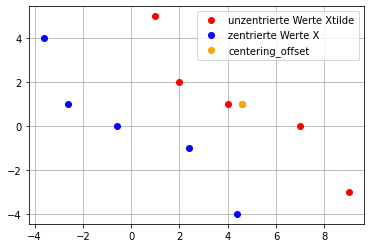

In [3]:
#Plotting
pl.plot(Xtilde.T[0],Xtilde.T[1],'ro', color = 'red', label = 'unzentrierte Werte Xtilde')
pl.plot(X.T[0],X.T[1],'ro', color = 'blue', label = 'zentrierte Werte X')
#centering_offset: Mittelwerte der Spalten, die Xtilde zwecks Zentrierung abgezogen werden
centering_offset = 1/n * np.ones([n,1]) @ np.ones([n,1]).T @ Xtilde
pl.plot(centering_offset.T[0],centering_offset.T[1],'ro', color='orange',label='centering_offset')
pl.grid()
pl.legend()

In [7]:
C = (1/(n-1))*X.T@X
print(f'Kovarianzmatrix C\n{C}')

Kovarianzmatrix C
[[11.3  -9.25]
 [-9.25  8.5 ]]


In [8]:
#np.linalg.eigvals(X@X.T)
#np.linalg.eigvals(X.T@X)

#SVD
S,V,D = np.linalg.svd(X.T@X)
V_true = np.diag(V)
print(f'S\n{S}\nV\n{V_true}\nD\n{D}')

#Eigenvaluedecomposition
EW, EV = np.linalg.eig(C)
EW_true = np.diag(EW)
print(f'\n\nEigenvektoren V\n{EV}\nEigenwerte\n{EW_true}\nEigenvektoren transponiert\n{EV.T}\n')
print(f'X@EV\n{X@EV}')


S
[[-0.75817  0.65206]
 [ 0.65206  0.75817]]
V
[[77.02138  0.     ]
 [ 0.       2.17862]]
D
[[-0.75817  0.65206]
 [ 0.65206  0.75817]]


Eigenvektoren V
[[ 0.75817  0.65206]
 [-0.65206  0.75817]]
Eigenwerte
[[19.25535  0.     ]
 [ 0.       0.54465]]
Eigenvektoren transponiert
[[ 0.75817 -0.65206]
 [ 0.65206  0.75817]]

X@EV
[[-5.33764  0.68528]
 [-2.6233  -0.93717]
 [-0.4549  -0.39123]
 [ 2.47167  0.80676]
 [ 5.94418 -0.16364]]
